In [1]:
import numpy as np
import torch
import espaloma as esp
from matplotlib import pyplot as plt

Using backend: pytorch


In [2]:
g = esp.Graph.load("cyclopropane")

In [3]:
model = torch.load("110.pt")

In [4]:
with torch.no_grad():
    model(g.heterograph)

/Users/wangy1/anaconda3/envs/esp/lib/python3.7/site-packages/dgl/base.py:45: DGLWarning: dgl.to_homo is deprecated. Please use dgl.to_homogeneous
  return warnings.warn(message, category=category, stacklevel=1)


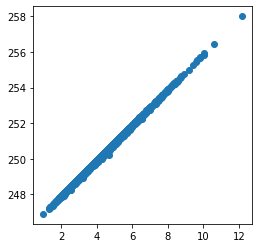

In [5]:
fig, ax = plt.subplots(1, 1)

ax.scatter(
    g.nodes['g'].data['u_n3_ref'] * 627.5,
    g.nodes['g'].data['u_n3'] * 627.5
)

ax.set_aspect('equal', 'box')

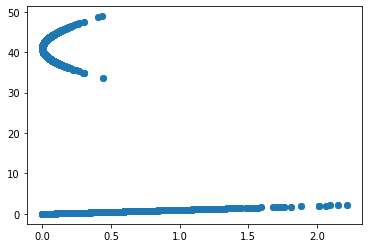

In [6]:
fig, ax = plt.subplots(1, 1)

ax.scatter(
    g.nodes['n3'].data['u_ref'] * 627.5,
    g.nodes['n3'].data['u'] * 627.5
)

# ax.set_aspect('equal', 'box')

In [7]:
k_ref = g.nodes['n3'].data['k_ref'][0].item()
eq_ref = g.nodes['n3'].data['eq_ref'][0].item()
k = g.nodes['n3'].data['k'][0].item()
eq = g.nodes['n3'].data['eq'][0].item()

In [8]:
x = g.nodes['n3'].data['x'][1].flatten().numpy()
x.sort()

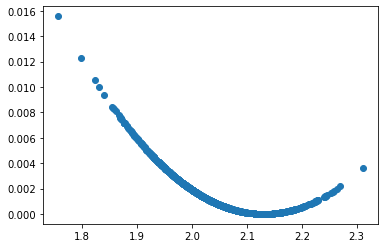

In [9]:
# plt.scatter(
#     x, 0.5 * k_ref * (x - eq_ref) ** 2
# )

plt.scatter(
    x, 0.5 * k * (x - eq) ** 2
)

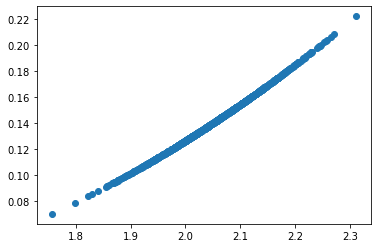

In [10]:
plt.scatter(
    x, 0.5 * k_ref * (x - eq_ref) ** 2
)

In [11]:
g.nodes['n3'].data['eq']

tensor([[2.1309],
        [2.0539],
        [2.0539],
        [2.1309],
        [2.0539],
        [2.0539],
        [2.1309],
        [2.0539],
        [2.0539],
        [2.0539],
        [2.0539],
        [2.0539],
        [2.0539],
        [2.0539],
        [2.0539],
        [1.9965],
        [1.9965],
        [1.9965],
        [2.1309],
        [2.0539],
        [2.0539],
        [2.1309],
        [2.0539],
        [2.0539],
        [2.1309],
        [2.0539],
        [2.0539],
        [2.0539],
        [2.0539],
        [2.0539],
        [2.0539],
        [2.0539],
        [2.0539],
        [1.9965],
        [1.9965],
        [1.9965]])

In [12]:
idxs = g.nodes['n3'].data['idxs']
ccc = torch.all(idxs < 3, dim=-1)
hch = (idxs[:, 0] >= 3) * (idxs[:, 1] < 3) * (idxs[:, 2] >= 3)
hcc = (idxs[:, 0] >= 3) * (idxs[:, 1] < 3) * (idxs[:, 2] < 3) + (idxs[:, 0] < 3) * (idxs[:, 1] < 3) * (idxs[:, 2] >= 3)

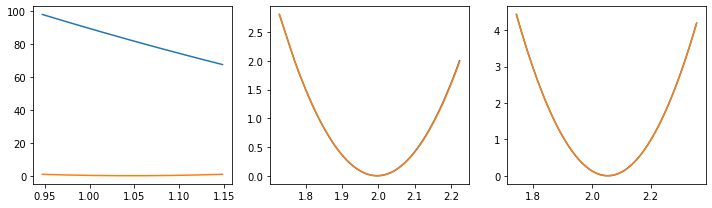

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
for name, _idxs, idx in zip(["ccc", "hch", "hcc"], [ccc, hch, hcc], [0, 1, 2]):
    x = g.nodes['n3'].data['x'][_idxs].detach().numpy().flatten()
    x.sort()
    k = g.nodes['n3'].data['k'][_idxs][0].item() * 627.5
    eq = g.nodes['n3'].data['eq'][_idxs][0].item()
    k_ref = g.nodes['n3'].data['k_ref'][_idxs][0].item() * 627.5
    eq_ref = g.nodes['n3'].data['eq_ref'][_idxs][0].item()
    ax = axs[idx]
    u = 0.5 * k * (x - eq) ** 2
    u_ref = 0.5 * k_ref * (x - eq_ref) ** 2
    ax.plot(x, u)
    ax.plot(x, u_ref)

plt.tight_layout()
    

In [14]:
x = g.nodes['n3'].data['x'][ccc].flatten()

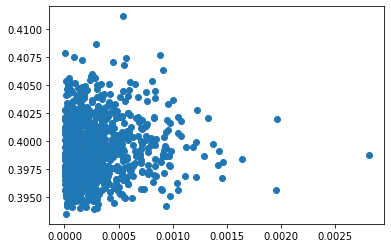

In [15]:
plt.scatter(
    g.nodes['n3'].data['u_ref'][ccc].sum(dim=0),
    g.nodes['n3'].data['u'].sum(dim=0),
)

In [18]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
x0_range = np.linspace(50, 70, 100)
delta_range = np.linspace(-10, 10, 100)
us = np.zeros((100, 100))

def get_angles(x0, delta):
    x1 = (180 + delta - x0) / 2
    x2 = x1 - delta
    return x0 * (math.pi/180), x1 * (math.pi/180), x2 * (math.pi/180)

def get_u(x, k, eq):
    return 0.5 * k * (x-eq) ** 2

for x0_idx, _x0 in enumerate(x0_range):
    for x1_idx, delta in enumerate(delta_range):
        x0, x1, x2 = get_angles(_x0, delta)
        assert (x0 + x1 + x2 - math.pi) ** 2 < 0.1
        u = get_u(x0, k, eq) + get_u(x1, k, eq) + get_u(x2, k, eq)
        u_ref = get_u(x0, k_ref, eq_ref) + get_u(x1, k_ref, eq_ref) + get_u(x2, k_ref, eq_ref)
        us[x0_idx, x1_idx] = u- u_ref


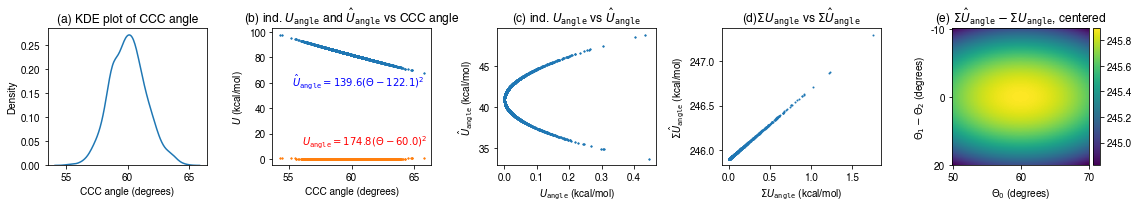

In [26]:
import seaborn as sns
import math
from mpl_toolkits.axes_grid1 import make_axes_locatable

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']

fig, axs = plt.subplots(1, 5, figsize=(16, 3))
x = g.nodes['n3'].data['x'][0].flatten().numpy() * (180/math.pi)
sns.kdeplot(x, ax=axs[0], alpha=0.5)
axs[0].set_xlabel("CCC angle (degrees)")
axs[0].set_title("(a) KDE plot of CCC angle")

x = g.nodes['n3'].data['x'][ccc].flatten().numpy()
x.sort()

k = g.nodes['n3'].data['k'][0].item() * 627.5
eq = g.nodes['n3'].data['eq'][0].item()
k_ref = g.nodes['n3'].data['k_ref'][0].item() * 627.5
eq_ref = g.nodes['n3'].data['eq_ref'][0].item()

axs[1].scatter(
    x * (180/math.pi),
    0.5 * k * (x-eq) ** 2,
    s=1.0,
    label="predicted",
)

axs[1].scatter(
    x * (180/math.pi),
    0.5 * k_ref * (x-eq_ref) ** 2,
    s=1.0,
    label="reference",
)

axs[1].set_xlabel("CCC angle (degrees)")
axs[1].set_ylabel("$U$ (kcal/mol)")
axs[1].set_title("(b) ind. $U_\mathtt{angle}$ and $\hat{U}_\mathtt{angle}$ vs CCC angle")

axs[2].scatter(
    g.nodes['n3'].data['u_ref'][ccc] * 627.5,
    g.nodes['n3'].data['u'][ccc] * 627.5,
    s=1.0,
)


axs[2].set_xlabel("$U_\mathtt{angle}$ (kcal/mol)")
axs[2].set_ylabel("$\hat{U}_\mathtt{angle}$ (kcal/mol)")
axs[2].set_title("(c) ind. $U_\mathtt{angle}$ vs $\hat{U}_\mathtt{angle}$")

axs[3].scatter(
    g.nodes['n3'].data['u_ref'][ccc].sum(dim=0) * 627.5,
    g.nodes['n3'].data['u'][ccc].sum(dim=0) * 627.5,
    s=1.0,
)

# const = (-g.nodes['n3'].data['u_ref'][ccc].sum(dim=0).mean() * 627.5 + g.nodes['n3'].data['u'][ccc].sum(dim=0).mean() * 627.5).mean()
# print(const)

# linspace = np.linspace(*axs[3].get_xlim(), 100)
# axs[3].plot(
#     linspace, linspace + const.item(),
# )

axs[3].set_title("(d)$ \Sigma U_\mathtt{angle}$ vs $\Sigma \hat{U}_\mathtt{angle}$")
axs[3].set_xlabel("$ \Sigma U_\mathtt{angle}$ (kcal/mol)")
axs[3].set_ylabel("$ \Sigma \hat{U}_\mathtt{angle}$ (kcal/mol)")


ax = axs[4]
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
im = ax.imshow(us)
fig.colorbar(im, cax=cax, orientation='vertical')
ax.set_xlabel("$\Theta_0$ (degrees)")
ax.set_ylabel("$\Theta_1 - \Theta_2$ (degrees)")
ax.set_xticks([0, 50, 100])
ax.set_xticklabels([50, 60, 70])
ax.set_yticks([0, 50, 100])
ax.set_yticklabels([-10, 0, 20])
ax.set_title("(e) $ \Sigma \hat{U}_\mathtt{angle} - \Sigma U_\mathtt{angle}$, centered")



axs[1].annotate( 
    "$\hat{U}_\mathtt{angle} = 139.6 (\Theta - 122.1) ^ 2$",
    xy=(20, 80), xycoords='axes points',
    color="blue")

axs[1].annotate(
    "$U_\mathtt{angle} = 174.8 (\Theta - 60.0) ^ 2$",
    xy=(30, 20), xycoords='axes points',
    color="red")

plt.tight_layout()

plt.savefig("cyclopropane.png", dpi=300)


In [203]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [254]:
eq * (180/math.pi)

122.09113405559533

In [255]:
k

139.58596497774124